In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [2]:
dataframe = pd.read_csv('D:/Users/Самат/Documents/pythondocs/ORGANICS.csv', encoding="cp1251")
dataframe['TargetBuy'].replace([0, 1], ['No', 'Buy'], inplace=True)

In [3]:
dataframe.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,No,0


In [4]:
dataframe.shape

(22223, 13)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null object
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 2.2+ MB


In [6]:
dataframe.dropna()
dataframe = dataframe.fillna(dataframe.median(axis=0), axis=0)

In [7]:
X = dataframe[['DemAffl', 'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]

In [8]:
y = dataframe.values[::, 11]
y

array(['No', 'No', 'Buy', ..., 'No', 'No', 'No'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf = 1, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [12]:
from sklearn.tree import export_graphviz
import subprocess
export_graphviz(clf, out_file='D:/Data/Organics_tree.dot',
rounded = True, proportion = False,
precision = 2, filled = True)
import pydot
(graph, ) = pydot.graph_from_dot_file('D:/Data/Organics_tree.dot')
graph.write_png('D:/Data/Organics_tree.png')

In [13]:
clf.score(X_train, y_train)

0.8405759835433273

In [14]:
clf.score(X_test,y_test)

0.7798110094495275

In [15]:
print(clf.min_samples_leaf)
print(clf.max_features)

1
None


In [16]:
max_depth_values = range(1, 12)

In [17]:
scores_data = pd.DataFrame()

In [18]:
for max_depth in max_depth_values:    
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': test_score})
    scores_data = scores_data.append(temp_score_data)

In [19]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.765235,0.757912
0,2,0.794870,0.792560
0,3,0.796734,0.790460
0,4,0.798663,0.794810
0,5,0.801556,0.790610


In [20]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name = 'set_type', value_name='score')

In [21]:
scores_data_long.head(12)

,max_depth,set_type,score
0,1,train_score,0.765235
1,2,train_score,0.794870
2,3,train_score,0.796734
3,4,train_score,0.798663
4,5,train_score,0.801556
5,6,train_score,0.804513
6,7,train_score,0.809270
7,8,train_score,0.813770
8,9,train_score,0.818527
9,10,train_score,0.823798


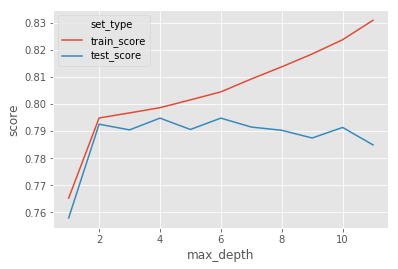

In [22]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)